## Support Vector Machine

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import datasets
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

X, y = datasets.fetch_openml('boston', return_X_y=True)
X = X.astype(float)
y = y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 1. Support Vector Regression

1995년, Vapnik와 Cortes는 Support Vector Network라는 모형을 제안하였다

```
sklearn.svm.SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
```

주요 Hyper Parameter는 다음과 같다

- kernel : SVM 커널 함수를 지정한다
- degree : kernel을 poly, 즉 비선형으로 지정하였을 때 지정하는 차수이다. 기본값은 3이며 값이 커질수록 모형이 복잡해진다
- coef0 : y intercept를 지정한다
- C : L2 score (Ridge)를 비용함수로 지정한다. 값이 작아질수록 일반화 성능이 커진다. 기본값은 1이다


https://link.springer.com/article/10.1007/BF00994018

#### 1.1 Hard Margin Model

**Hard Margin Model**의 목적은 모든 데이터 포인트가 오차 없이 회귀선에 정확히 맞도록 하는 것이다. 이 모델은 오차를 허용하지 않으며, 마진을 최대화하면서 회귀 계수 $w$를 최소화하는 방식으로 작동한다. Hard Margin Model은 오차가 전혀 허용되지 않기 때문에, 데이터가 선형적으로 완벽하게 분리 가능한 상황에서만 사용된다.

이 문제는 다음과 같은 최적화 문제로 표현할 수 있다

$$\min_{w, b} \frac{1}{2} ||w||^2$$

여기서 $w$는 회귀 계수(coefficient), $b$는 절편(y intercept), $||w||^2$는 회귀 계수의 제곱합이다. 회귀계수의 제곱합은 margin을 최소화하려는 목적을 갖는다. 한편, 제약 조건은 다음과 같이 주어진다.

$$y_i = w^T x_i + b \quad \text{for all} \quad i = 1, 2, \dots, n$$

여기서 $y_i$는 실제 출력값을 의미하고, $x_i$는 feature, $y_i$는 오차 없이 회귀선 $w^T x_i + b$에 맞아야 한다는 의미이다. 이 최적화 문제는 라그랑주 승수법을 사용하여 해결할 수 있다.

$$\mathcal{L}(w, b, \alpha) = \frac{1}{2} ||w||^2 - \sum_{i=1}^{n} \alpha_i (y_i - (w^T x_i + b))$$

여기서:

- $\alpha_i \geq 0$는 라그랑주 승수로, 각 데이터 포인트에 대응하는 상수를 나타낸다.
- $\mathcal{L}(w, b, \alpha)$는 라그랑주 함수로, 제약 조건을 포함한 목적 함수를 의미한다.

라그랑주 함수는 데이터 포인트들이 오차 없이 회귀선에 맞도록 최적화하는 목적을 가진다. 최적 조건은 기울기가 0일 때 발생한다. 이를 위해 $w$와 $b$에 대해 편미분을 수행하여 다음과 같은 조건을 얻게 된다

$$\frac{\partial L}{\partial w} = w - \sum_{i=1}^{n} \alpha_i x_i = 0$$

따라서, 최적화된 w는 다음과 같이 계산된다

$$w = \sum_{i=1}^{n} \alpha_i x_i$$

이 식은 결정 함수를 나타내며, 중요한 점은 $\alpha_i$가 0이 아닌 데이터 포인트만이 회귀선에 영향을 미친다는 것이다. **Support Vectors**는 이러한 $\alpha_i$ 값이 0이 아닌 데이터 포인트들로 구성된다.

또한, 절편 $b$는 다음과 같은 식으로 계산할 수 있다

$$y_i = w^T x_i + b$$

즉, $b$는 회귀선과 축이 만나는 지점을 나타내며, 모든 데이터 포인트가 이 회귀선에 정확히 맞도록 한다. Hard Margin SVR에서 최적화하는 목표는 오차 없이 모든 데이터 포인트가 회귀선에 맞도록 하면서, $||w||^2$를 최소화하여 마진을 최대화하는 것이다. Hard Margin SVR은 오차가 전혀 허용되지 않는 모델로, 데이터가 완벽하게 선형적으로 분리 가능한 상황에서만 사용된다. 데이터가 오차를 허용해야 하는 경우에는 Soft Margin SVR이 사용된다.

이 모델은 마진이 큰 회귀선을 찾는 것이 목적이며, 이를 통해 일반화 성능을 극대화하려고 한다. 그러나 오차를 허용하지 않기 때문에, 현실적인 데이터에서는 과적합 문제를 일으킬 수 있다.

In [2]:
from sklearn.svm import SVR

hard_regression = SVR(
    kernel = 'linear',
    C = 100
)
hard_regression.fit(X_train, y_train)

SVR(C=100, kernel='linear')

In [3]:
y_pred = hard_regression.predict(X_test)

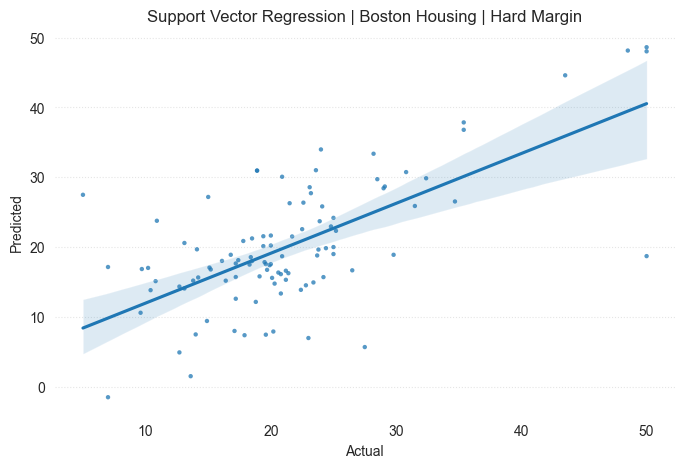

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (8, 5))
sns.regplot(
    x = y_test, 
    y = y_pred, 
    scatter_kws = {'s' : 10, 'edgecolor' : 'None', 'marker' : '.', 'alpha' : 0.75},
    ax=ax
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.xlabel('Actual')
plt.ylabel('Predicted')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Support Vector Regression | Boston Housing | Hard Margin')
plt.show()

#### 1.2 Soft Margin Model

<center><img src = "https://leejiyoon52.github.io/images/image_67.png" alt="My Image"></center>

과적합이나 기타 일반화 성능 향상을 위해, 보통은 아래와 같은 손실함수를 최적화하는 것을 목적으로 한다

$$\mathrm{Loss_{SVR}} = \min_w \frac{1}{2}||w||^2 + C\sum_{i = 1}^n (\xi_i + \xi_i^*)$$
$$\mathrm{such~that~} (w^T x_i + b) - y_i \leq \epsilon + \xi_i$$
$$y_i - (w^T x_i + b) \leq \epsilon + \xi_i^*$$
$$\xi_i, \xi_i^* \geq 0$$

추정된 회귀식에서 상단과 하단에 각각 $\epsilon$만큼 마진을 생성하여 추정식의 허용 범위를 넓혀 준다. 즉, margin 값을 크게 줄 수록 모형의 노이즈 허용 범위가 커지는 것이다

비용함수 최적화에 있어서 Lagrangian Problem으로 해를 찾는 것이 가능하지만, 그 과정이 길기 때문에 우선은 생략한다. Lagrangian Dual Problem은 다음과 같이 정리된다

$$\mathcal{L_D} = \frac{1}{2}\sum_{i,j = 1}^n (\alpha_i^* - \alpha_i)(\alpha_j^* - \alpha_j) \mathbf{x_i}^T\mathbf{x_j} - \epsilon \sum_{i,j = 1}^n(\alpha_i^* - \alpha_i) + \sum_{i,j = 1}^n y_i(\alpha_i^* - \alpha_i)$$
$$\mathrm{such ~ that ~} \sum_{i=1}^n (\alpha_i^* - \alpha_i) = 0, ~~~~~ \alpha_i, \alpha_i^* \in [0,C]$$

Lagrangian dual problem으로 재구성한 목적식은 $α$로 이루어져있는 convex하고, 연속적인 quadratic programming problem이다. 최적화 프로그램을 이용한다면 간편하게 $α$를 도출할 수 있다

In [5]:
soft_regression = SVR(
    kernel = 'linear',
    C = 0.1
)
soft_regression.fit(X_train, y_train)

SVR(C=0.1, kernel='linear')

In [6]:
y_pred = soft_regression.predict(X_test)

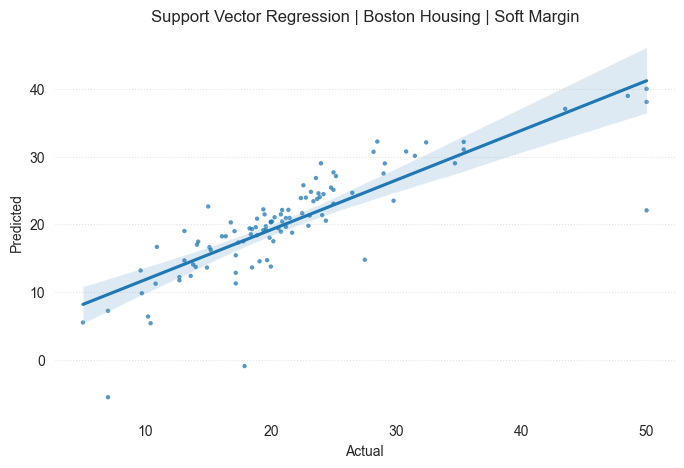

In [7]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.regplot(
    x = y_test, 
    y = y_pred, 
    scatter_kws = {'s' : 10, 'edgecolor' : 'None', 'marker' : '.', 'alpha' : 0.75},
    ax=ax
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.xlabel('Actual')
plt.ylabel('Predicted')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Support Vector Regression | Boston Housing | Soft Margin')
plt.show()

#### 1.3 Kernel Function

Support Vector Machine은 선형 모형이기 때문에 비선형 회귀식을 구해야 하는 경우가 상당히 제약적이었다. 이런 경우 Mapping function의 일종인 Kernel Function을 사용하여 해결하게 되었다

$$x = (x_1, x_2, \dots, x_p) \Rightarrow \phi(x) = z = (z_1, z_2, \dots, z_q)$$

<center><img src = "https://leejiyoon52.github.io/images/image_80.png" alt="My Image"></center>

즉, 중간에 비선형 공간을 추가하여 선형공간으로 다시 데이터를 평평하게 펴는 과정을 거치는 것이라 이해하면 좋다. Kernel Function이 포함된 Lagrangian Dual Problem은 다음과 같이 표현된다

$$\mathcal{L_D} = \frac{1}{2}\sum_{i,j = 1}^n (\alpha_i^* - \alpha_i)(\alpha_j^* - \alpha_j)\mathbf{K(x_i^,x_j)} - \epsilon \sum_{i,j = 1}^n(\alpha_i^* - \alpha_i) + \sum_{i,j = 1}^n y_i(\alpha_i^* - \alpha_i)$$

평면식과는 다르게 중간 과정에서 Kernel Function의 Mapping과정이 포함된것을 알 수 있다

대표적인 kernel function에는 다음과 같은 것들이 있다. 주로 rbf가 자주 사용된다

- linear : 선형 커널
- poly : 비선형 커널, 3차 함수가 기본적으로 추정된다
- rbf(default) : RBF커널, 가우시안 커널이다. 성능이 좋기 때문에 자주 사용된다
- sigmoid : sigmoid 커널
- precomputed

In [8]:
rbf_regression = SVR(
    kernel = 'rbf',
    C = 1,
    gamma = 1e-5
)
rbf_regression.fit(X_train, y_train)

SVR(C=1, gamma=1e-05)

In [9]:
y_pred = rbf_regression.predict(X_test)

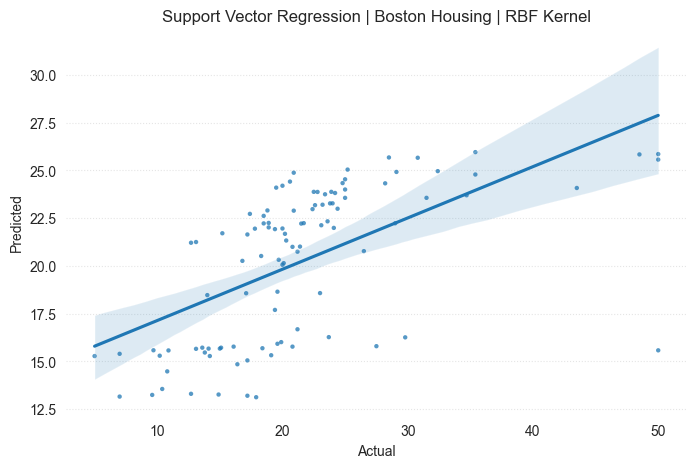

In [10]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.regplot(
    x = y_test, 
    y = y_pred, 
    scatter_kws = {'s' : 10, 'edgecolor' : 'None', 'marker' : '.', 'alpha' : 0.75},
    ax=ax
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.xlabel('Actual')
plt.ylabel('Predicted')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Support Vector Regression | Boston Housing | RBF Kernel')
plt.show()

### 2. Support Vector Classifier

<center><img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/600px-SVM_margin.png" alt="My Image"></center>

Support Vector Regression의 원형은 Support Vector Machine으로, 원래 분류를 목적으로 제안된 모형이다. 1992년 Vladimir N. Vapnik와 Alexey Ya. Chervonenkis에 의해 Hard Margin model이 처음 제안되었고, 1995년 soft margin model은 Corinna Cortes and Vapnik에 의해 1995년에 제안된 모형이다. sklearn에서는 아래 함수를 통해 불러올 수 있다

```
sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
```

Regression의 Support Vector가 맨 바깥쪽에 위치한 것에 비해, Classification Model에서는 추정되는 결정 경계에 가장 가까운 vector가 support vector가 된다

In [11]:
data = pd.read_csv('../../Data/Credit_card_data.csv', index_col = 0)

data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [12]:
data = data.sample(n = 300, random_state = 42) # down sampling

In [13]:
X = data.drop(['default.payment.next.month'], axis = 1)
y = data['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### 2.1 Hard Margin Model

데이터가 아래와 같이 총 $n$개 있다고 가정하자

$$(x_1, y_1), \dots, (x_n, y_n)$$

여기서 $y_i$는 1과 -1으로 labeling된 정성 변수이다. SVM의 목적은 $y = -1$과 $y=1$로 labeling된 **데이터들의 거리를 최대화** 하는 것이다. 거리를 최대화하는 가상의 공간을 **Hyperplane(초평면)** 이라고 하며, 다음의 식을 만족한다

$$\mathbf{w}^T \mathbf{x} - b = 0$$

여기서 $\mathbf {w} $는 초평면의 normal vector, $b$는 bias(=intercept)이다. 추정해야하는 parameter  ${\frac {b}{\|\mathbf {w} \|}} $는 $\mathbf {w} $에 의해 결정된다

$y = -1$과 $y=1$로 labeling된 데이터들은 다음을 만족할 것이다

$${\displaystyle \mathbf {w} ^{\mathsf {T}}\mathbf {x} _{i}-b\geq 1\,,{\text{ if }}y_{i}=1}$$
$${\displaystyle \mathbf {w} ^{\mathsf {T}}\mathbf {x} _{i}-b\leq -1\,,{\text{ if }}y_{i}=-1}$$

이러한 제약 조건은 각 데이터 점이 여백의 올바른 쪽에 놓여 있어야 함을 나타내며, 다음과 같이 다시 쓸 수 있다

$${\displaystyle y_{i}(\mathbf {w} ^{\mathsf {T}}\mathbf {x} _{i}-b)\geq 1,\quad {\text{ for all }}1\leq i\leq n}$$

이를 조합하면 다음과 같은 최적화 문제를 얻을 수 있다

$${\displaystyle {\begin{aligned}&{\underset {\mathbf {w} ,\;b}{\operatorname {minimize} }}&&\|\mathbf {w} \|_{2}^{2}\\&{\text{subject to}}&&y_{i}(\mathbf {w} ^{\top }\mathbf {x} _{i}-b)\geq 1\quad \forall i\in \{1,\dots ,n\}\end{aligned}}}$$

최적화 문제에서 추정된 $\mathbf {w} $와 $b$는 어느 support vector들간의 거리를 최대화하는(${\displaystyle \mathbf {x} \mapsto \operatorname {sgn}(\mathbf {w} ^{\mathsf {T}}\mathbf {x} -b)}$) 값이다

In [ ]:
from sklearn.svm import SVC

hard_classification = SVC(
    kernel = 'linear',
    C = 100, 
    probability = True,
    random_state = 42
)

hard_classification.fit(X_train, y_train)

In [ ]:
y_pred = hard_classification.predict(X_test)
y_prob = hard_classification.predict_proba(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(fpr, tpr, label = f'Logit Model (AUC : {roc_auc : .2f})', alpha = 0.8)
ax.plot([0, 1], [0, 1], 'k:')
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.legend()
plt.title('ROC Curve with Support Vector Machine | Hard Margin Model')
plt.show()

#### 2.2 Soft Margin Model

Hard Margin Model의 고질적인 Overfit 문제로 인해 탄생한 모형이다. Support vector간의 거리 최대화에 어느정도의 유연성을 인정한다

Soft Margin Model에서 목적은 다음과 같이 달라진다

$${\displaystyle \lambda \lVert \mathbf {w} \rVert ^{2}+\left[{\frac {1}{n}}\sum _{i=1}^{n}\max \left(0,1-y_{i}(\mathbf {w} ^{\mathsf {T}}\mathbf {x} _{i}-b)\right)\right]}$$

여기서 parameter $\lambda >0 $는 margin size를 조정해주는 hyper parameter이다. $\lambda$의 값이 0에 가까울수록 모형이 더욱 엄격해지며, 큰 값이 될 수록 모형이 유연해진다. 최적화 문제는 여기서 다음과 같이 다시 정의된다

$${\displaystyle {\begin{aligned}&{\underset {\mathbf {w} ,\;b,\;\mathbf {\zeta } }{\operatorname {minimize} }}&&\|\mathbf {w} \|_{2}^{2}+C\sum _{i=1}^{n}\zeta _{i}\\&{\text{subject to}}&&y_{i}(\mathbf {w} ^{\top }\mathbf {x} _{i}-b)\geq 1-\zeta _{i},\quad \zeta _{i}\geq 0\quad \forall i\in \{1,\dots ,n\}\end{aligned}}}$$

$C$값이 큰 경우 입력 데이터가 선형 분류 가능한 경우 Hard Margin SVM과 유사하게 동작하지만, $C$값이 작을수록 모형이 단순해진다. 일반적으로 $C$와 $\lambda$는 반비례 관계에 있다

In [ ]:
soft_classification = SVC(
    kernel = 'linear',
    C = 0.01, 
    probability = True,
    random_state = 42
)

soft_classification.fit(X_train, y_train)

In [ ]:
y_pred = soft_classification.predict(X_test)
y_prob = soft_classification.predict_proba(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(fpr, tpr, label = f'Logit Model (AUC : {roc_auc : .2f})', alpha = 0.8)
ax.plot([0, 1], [0, 1], 'k:')
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.legend()
plt.title('ROC Curve with Support Vector Machine | Soft Margin Model')
plt.show()

#### 2.3 Nonlinear Kernels

<center><img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Kernel_Machine.svg/1920px-Kernel_Machine.svg.png" alt="My Image"></center>

Kernel function을 SVM에 적용하면 Feature map이 비선형적 공간에 선형적인 공간으로 mapping되며 비선형적 모형도 추정이 가능하다. 복잡한 모형 또한 직관적으로 해석할 수 있다는 장점이 있지만, 연산량이 비대하여 학습 시간이 굉장히 오래 걸린다. 대표적인 kernel로는 다음과 같은것이 존재한다

**Polynoimal**

$${\displaystyle k(\mathbf {x} _{i},\mathbf {x} _{j})=(\mathbf {x} _{i}\cdot \mathbf {x} _{j})^{d}}$$

여기서 $d = 1$이면 lienar kernel과 같다

**Gaussian radial basis function**

$${\displaystyle k(\mathbf {x} _{i},\mathbf {x} _{j})=\exp \left(-\gamma \left\|\mathbf {x} _{i}-\mathbf {x} _{j}\right\|^{2}\right)} \mbox{ for } \gamma >0.$$

**Sigmoid function**

$${\displaystyle k(\mathbf {x_{i}} ,\mathbf {x_{j}} )=\tanh(\kappa \mathbf {x} _{i}\cdot \mathbf {x} _{j}+c)} $$

sklearn의 SVM에서는 kernel에서 지정 가능하다. 위에서부터 각각 `'polynomial', 'rbf', 'sigmoid'`로 지정할 수 있다. 기본값은 `rbf`이다

```
sklearn.svm.SVC(kernel = 'polynomial', degree = 3)
sklearn.svm.SVC(kernel = 'rbf') # default
sklearn.svm.SVC(kernel = 'sigmoid')
```